<a href="https://colab.research.google.com/github/eternaldemon/AI-Median-TIET/blob/master/Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import Dense,Flatten,Dropout,Input
import seaborn as sns

from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

In [ ]:
from google.colab import files
files.upload()

Saving Customers2.xlsx to Customers2.xlsx


{'Customers2.xlsx': b'PK\x03\x04\x14\x00\x08\x08\x08\x00\x8d^\x8bP\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x18\x00\x00\x00xl/drawings/drawing1.xml\x9d\x90\xcd\x0e\x820\x10\x84\xef>\x05\xd9\xbb\x14=\x18C\xf8\xb9\x10\x9f@\x1f`C\x17hB\xb7M\xb7\n\xbe\xbdM\x90\xbb\xf18\x99\xcc\x97\x99\xa9\xda\xd5\xce\xd9\x8b\x82\x18\xc75\x9c\xf2\x022\xe2\xdei\xc3c\r\x8f\xfb\xedx\x85L"\xb2\xc6\xd91\xd5\xf0&\x81\xb69T\xab\x0e\xe5"]\xc8R\x9e\xa5L\xb2\x86)F_*%\xfdD\x16%w\x9e8\xb9\x83\x0b\x16c\x92aT:\xe0\x92\xc8vV\xe7\xa2\xb8(\xf1\x81P\xcbD\x14\xbb\xcd\x81/\x0f\xff\xa0Y4\xbc\xe7\x7fj\xe3\x86\xc1\xf4\xd4\xb9\xfei\x89\xe3\x06\t4cL_\xc8d\xbc@S\xa9}h\xf3\x01PK\x07\x08\xc7\xcdN\xab\xa8\x00\x00\x00+\x01\x00\x00PK\x03\x04\x14\x00\x08\x08\x08\x00\x8d^\x8bP\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x1a\x00\x00\x00xl/_rels/workbook.xml.rels\xad\x91Mk\xc30\x0c\x86\xef\xfd\x15F\xf7\xc5I\x07c\x8c8\xbd\x8cA\xaf\xfd\xf8\x01\xc6Q\xe2\xd0\xc46\x92\xd6\xb5\xff~.\x1b[\ne\xec\xd0\x93\xd0\xd7\xf3\xbeH\xf5\xea4\x8d\xea\

In [ ]:
data = pd.read_excel('Customers2.xlsx',)

In [ ]:
data.head()

,CustomerID,NumCalls,NumEmails,NumDownloads,NumEvents,NumForms,Language,Country,WebVisits,PageVisits,PriorClient,MadeAPurchase
0,1,33,19,1,0,1,German,Germany,10.0,0.0,Yes,No
1,2,0,1,0,1,0,English,USA,61.0,0.0,No,No
2,3,4,6,2,0,0,Spanish,Mexico,1.0,0.0,No,No
3,4,0,10,0,0,1,English,India,26.0,0.0,No,No
4,5,7,0,0,0,0,English,USA,11.0,0.0,No,Yes


In [ ]:
data['TotalInteractions'] = data['NumCalls']+data['NumEmails']+data['NumDownloads']+data['NumEvents']+data['NumForms']+data['PageVisits'] + data['WebVisits']

In [ ]:
todrop=['NumCalls','NumEmails','NumDownloads','NumEvents','NumForms','PageVisits','WebVisits']
data = data.drop(todrop,axis=1)

In [ ]:
data.head()

,CustomerID,Language,Country,PriorClient,MadeAPurchase,TotalInteractions
0,1,German,Germany,Yes,No,64.0
1,2,English,USA,No,No,63.0
2,3,Spanish,Mexico,No,No,13.0
3,4,English,India,No,No,37.0
4,5,English,USA,No,Yes,18.0


In [ ]:
print(len(data['Language'].unique()))
print(len(data['Country'].unique()))

18
28


In [ ]:
data.isnull().sum()

CustomerID            0
Language              0
Country               0
PriorClient           0
MadeAPurchase         0
TotalInteractions    14
dtype: int64

In [ ]:
data['TotalInteractions'].fillna(value=data['TotalInteractions'].mean(),inplace=True)
print(data.isnull().sum())


CustomerID           0
Language             0
Country              0
PriorClient          0
MadeAPurchase        0
TotalInteractions    0
dtype: int64


In [ ]:
data.shape

(753, 6)

In [ ]:
dataset = data.iloc[:,:]
dataset = dataset.drop(['MadeAPurchase'],axis=1)
y = data['MadeAPurchase']

In [ ]:
X = dataset

In [ ]:
extracolumns = len(data['Language'].unique()) + len(data['Country'].unique()) -4 #because of drop first
print(extracolumns)

42


In [ ]:
# Top 10 categories in categorical columns
print(X.Language.value_counts().sort_values(ascending=False).head(20).index)
print(X.Country.value_counts().sort_values(ascending=False).head(20).index)

Index(['English', 'German', 'Spanish', 'Japanese', 'Chinese', 'Italian',
       'Portuguese', 'Dutch', 'Finnish', 'Russian', 'French', 'Korean',
       'Turkish', 'Norwegian', 'Arabic', 'Czech', 'Hungarian',
       'Chinese trad.'],
      dtype='object')
Index(['USA', 'Canada', 'Japan', 'France', 'China', 'Mexico', 'Spain',
       'Colombia', 'India', 'Switzerland', 'Brazil', 'Italy', 'Singapore',
       'Germany', 'Finland', 'Austria', 'Netherlands', 'Belgium', 'Chile',
       'Peru'],
      dtype='object')


In [ ]:
top5countries = X.Country.value_counts().sort_values(ascending=False).head(5).index
top5countries = list(top5countries)
print(top5countries)

temp = X.Country
print(temp.shape)

#temp = np.array(temp)
#temp = np.reshape(temp,(1,-1))
print(temp.shape)
temp = list(temp)
print(temp)

['USA', 'Canada', 'Japan', 'France', 'China']
(753,)
(753,)
['Germany', 'USA', 'Mexico', 'India', 'USA', 'USA', 'USA', 'USA', 'India', 'Spain', 'China', 'China', 'China', 'Denmark', 'France', 'Japan', 'USA', 'Japan', 'Switzerland', 'USA', 'Uganda', 'USA', 'Germany', 'USA', 'USA', 'Argentina', 'Austria', 'Mexico', 'Mexico', 'Mexico', 'USA', 'Germany', 'Germany', 'USA', 'Japan', 'Japan', 'Belgium', 'USA', 'Colombia', 'Singapore', 'USA', 'USA', 'USA', 'Mexico', 'USA', 'USA', 'USA', 'Germany', 'Germany', 'Germany', 'USA', 'Hungary', 'USA', 'Brazil', 'China', 'Switzerland', 'Chile', 'Italy', 'Japan', 'USA', 'Colombia', 'Germany', 'Switzerland', 'Portugal', 'USA', 'Canada', 'USA', 'USA', 'USA', 'Mexico', 'USA', 'USA', 'Germany', 'Germany', 'Canada', 'India', 'China', 'Switzerland', 'USA', 'USA', 'USA', 'Brazil', 'Spain', 'Finland', 'USA', 'Brazil', 'China', 'Spain', 'USA', 'Italy', 'USA', 'USA', 'USA', 'India', 'Canada', 'USA', 'Colombia', 'Canada', 'China', 'USA', 'USA', 'Japan', 'USA', 'US

In [ ]:
new =[]
for i in temp:
  if i not in top5countries:
    new.append('Others')
  else:
    new.append(i)

In [ ]:
new = np.array(new)
new = np.reshape(new,(-1,1))
new = pd.DataFrame(new)
print(new.shape)

X.Country = new

(753, 1)


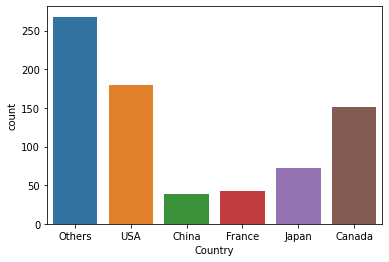

In [ ]:
sns.countplot(X.Country,label="Count")

In [ ]:
X = pd.get_dummies(X,drop_first=True)

In [ ]:
X.head()

,CustomerID,TotalInteractions,Language_Chinese,Language_Chinese trad.,Language_Czech,Language_Dutch,Language_English,Language_Finnish,Language_French,Language_German,Language_Hungarian,Language_Italian,Language_Japanese,Language_Korean,Language_Norwegian,Language_Portuguese,Language_Russian,Language_Spanish,Language_Turkish,Country_China,Country_France,Country_Japan,Country_Others,Country_USA,PriorClient_Yes
0,1,64.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
1,2,63.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,3,13.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
3,4,37.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,5,18.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
X.shape 

(753, 25)

In [ ]:
y = y.map({'Yes':1,'No':0})

In [ ]:
y.head()

0    0
1    0
2    0
3    0
4    1
Name: MadeAPurchase, dtype: int64

In [ ]:
y = np.array(y)
y = np.reshape(y,(-1,1))
y = pd.DataFrame(y)
print(y.shape)

(753, 1)


In [ ]:
sns.pairplot(X)

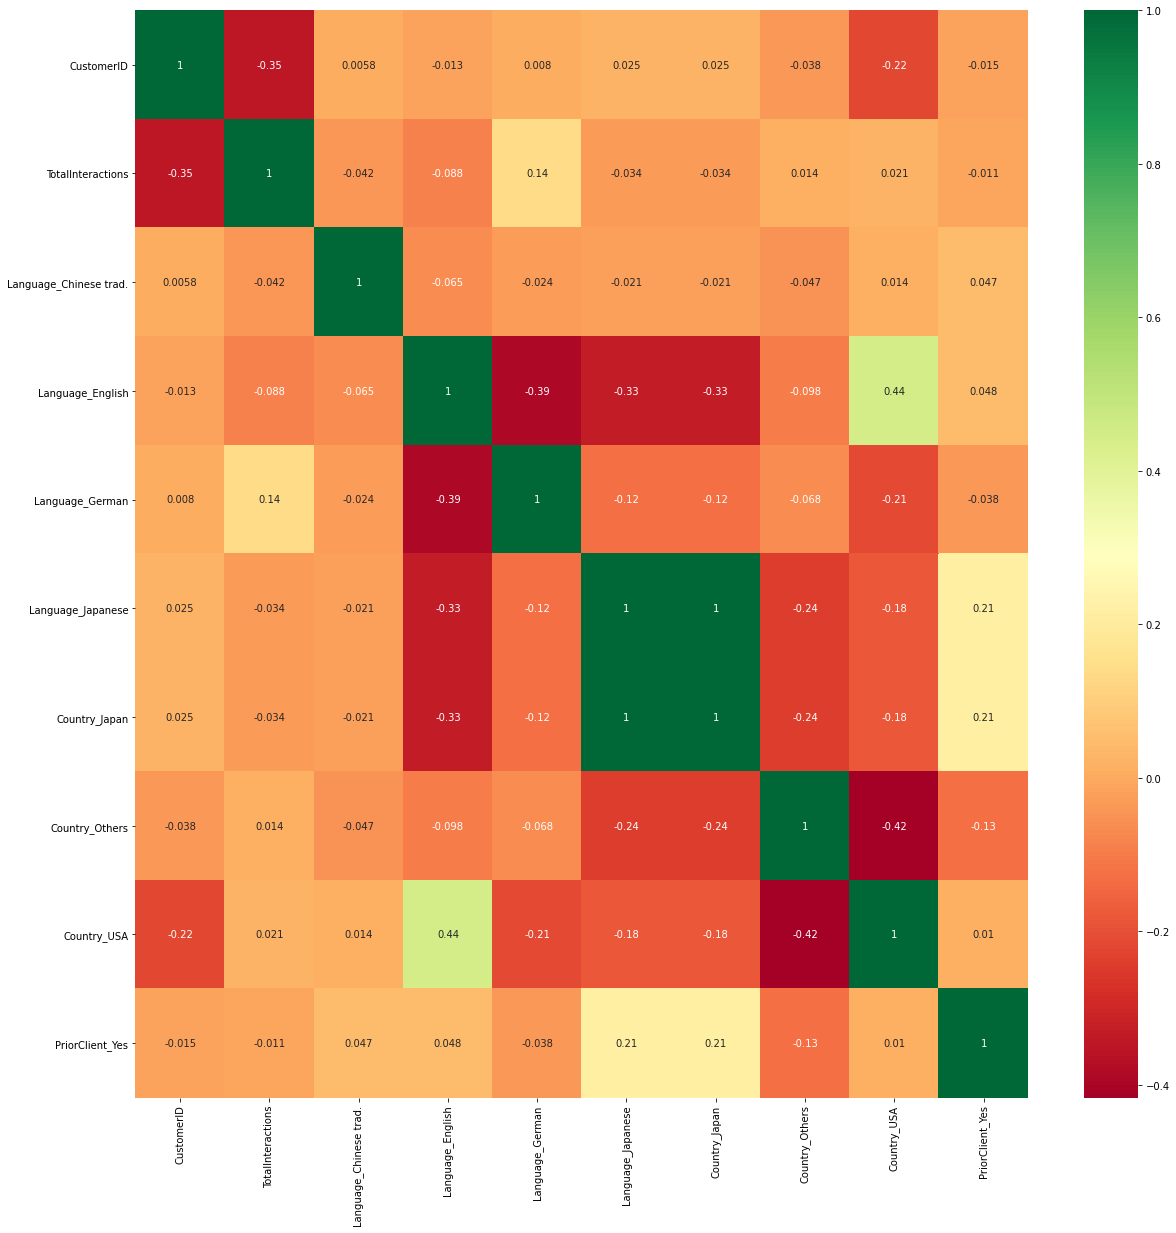

In [ ]:
# Heatmap and correlation before taking most important features

corrmat = X.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#Plotting Pearson Correlation
g = sns.heatmap(X[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [ ]:
# Important Features
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [ ]:
print(model.feature_importances_)

[0.46303445 0.33711574 0.01097684 0.0100178  0.01597968 0.03852262
 0.04344041 0.03063187 0.01595208 0.03432849]


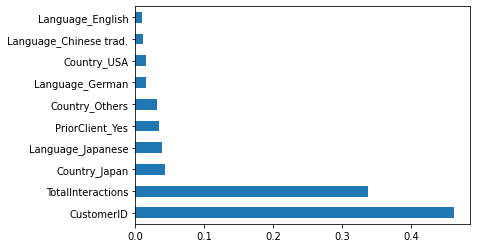

In [ ]:

feat_importances = pd.Series(model.feature_importances_, index = X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

# It shows that mainly top 10 features can be considered to be most important or less than that, as you prefer

In [ ]:
req_features = feat_importances.nlargest(10).index
req_features = list(req_features)
print(req_features)

['CustomerID', 'TotalInteractions', 'Country_Japan', 'Language_Japanese', 'PriorClient_Yes', 'Country_Others', 'Language_German', 'Country_USA', 'Language_Chinese trad.', 'Language_English']


In [ ]:
totalfeatures = list(X.columns)
print(totalfeatures)
notreq = []
for i in totalfeatures:
  if i not in req_features:
    notreq.append(i)

['CustomerID', 'TotalInteractions', 'Language_Chinese trad.', 'Language_English', 'Language_German', 'Language_Japanese', 'Country_Japan', 'Country_Others', 'Country_USA', 'PriorClient_Yes']


In [ ]:
print(len(req_features))
print(len(totalfeatures))
print(len(notreq))

10
10
0


In [ ]:
print('Before Dropping:',X.shape)
X = X.drop(notreq,axis=1)
print('After Dropping:',X.shape)

Before Dropping: (753, 10)
After Dropping: (753, 10)


In [ ]:
X.head()

,CustomerID,TotalInteractions,Language_Chinese trad.,Language_English,Language_German,Language_Japanese,Country_Japan,Country_Others,Country_USA,PriorClient_Yes
0,1,64.0,0,0,1,0,0,1,0,1
1,2,63.0,0,1,0,0,0,0,1,0
2,3,13.0,0,0,0,0,0,1,0,0
3,4,37.0,0,1,0,0,0,1,0,0
4,5,18.0,0,1,0,0,0,0,1,0


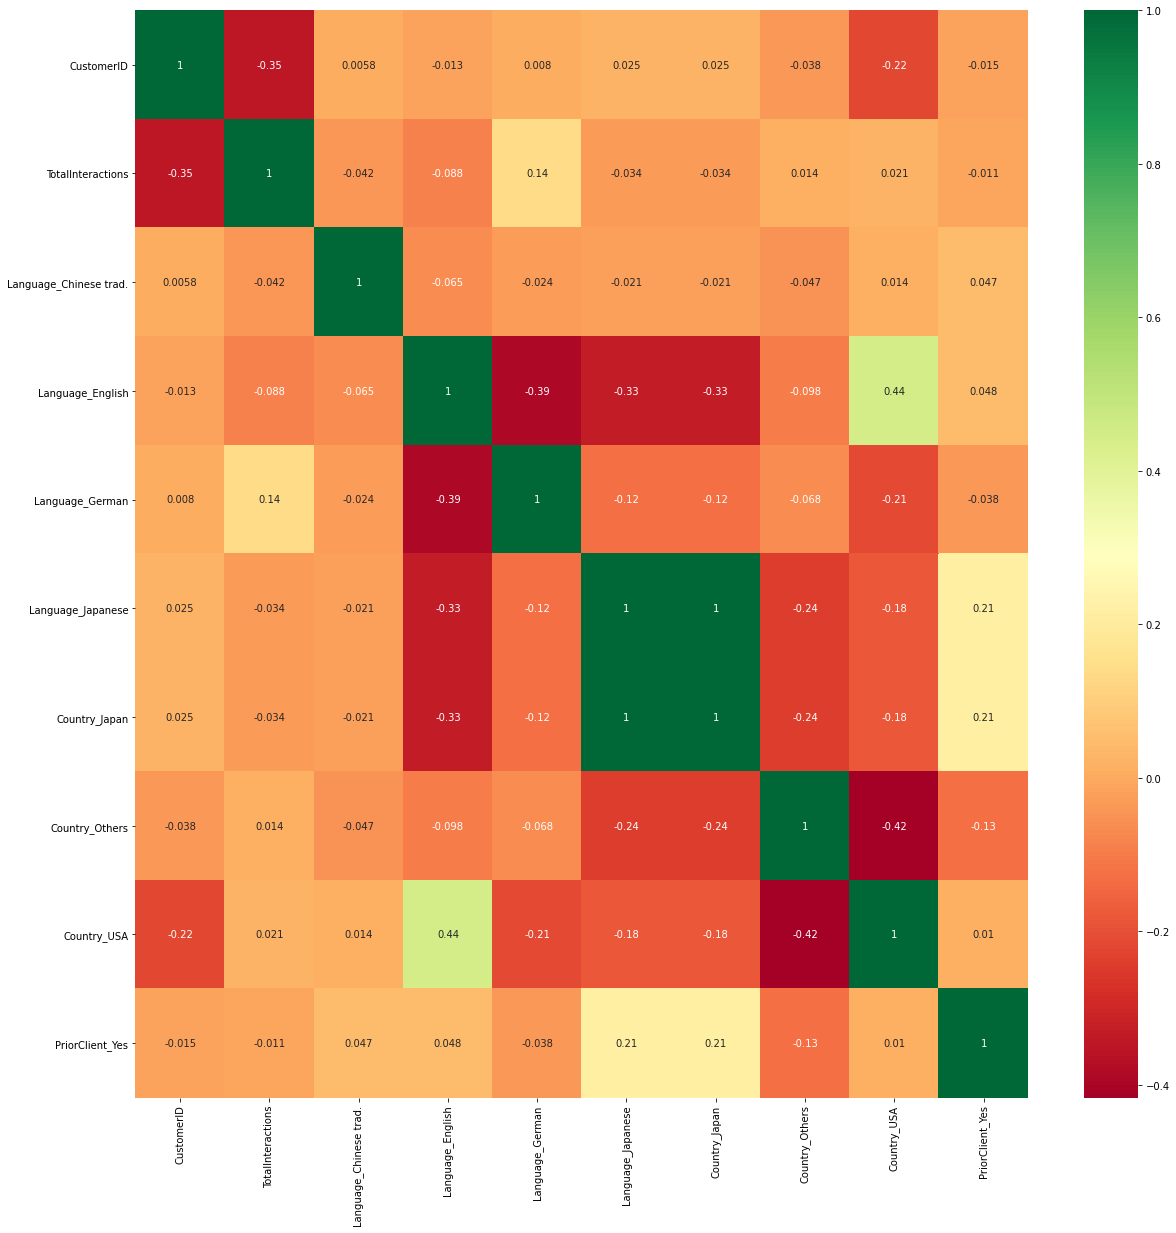

In [ ]:
# Heatmap and correlation after taking only top features

corrmat = X.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#Plotting Pearson Correlation
g = sns.heatmap(X[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.1)

In [ ]:
# Function to create model, required for KerasClassifier
def create_model(optimizer='adam',metrics=['accuracy']):
  model = Sequential()
  model.add(Dense(16, input_shape=(X.shape[1],), activation='relu'))
  model.add(Dense(8, activation='relu'))
  model.add(Dense(1,activation='sigmoid'))
  #model.summary()
  model.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=metrics)
	
  return model

In [ ]:
'''
i = Input(shape=(10,))
o = Dense(16,activation='relu')(i)
o = Dense(8,activation='relu')(o)
o = Dense(1,activation='sigmoid')(o)
model = Model(i,o)

model.summary()
'''

In [ ]:
'''
opt = tf.keras.optimizers.Adam(lr=0.0001)
model.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

his = model.fit(x_train,y_train,epochs=200,verbose=2,validation_data=(x_test,y_test))
'''

In [ ]:
model = KerasClassifier(build_fn=create_model, verbose=2)

optimizers = ['adam','sgd','rmsprop']
epochs = [250,500]
batches = [10,20,50,100]
metrics = ['accuracy']

#parameters = {'optimizer':optimizers,'epochs':epochs,'batch_size':batches,'init':init}
parameters = dict(optimizer=optimizers,epochs=epochs,batch_size=batches,metrics=metrics)
grid = GridSearchCV(model,parameters,verbose=1)
grid.fit(x_train,y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Epoch 1/250


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Streaming output truncated to the last 5000 lines.
6/6 - 0s - loss: 9.5806 - accuracy: 0.6784
Epoch 5/500
6/6 - 0s - loss: 6.9161 - accuracy: 0.6784
Epoch 6/500
6/6 - 0s - loss: 4.4744 - accuracy: 0.6784
Epoch 7/500
6/6 - 0s - loss: 2.1189 - accuracy: 0.6765
Epoch 8/500
6/6 - 0s - loss: 0.7628 - accuracy: 0.6599
Epoch 9/500
6/6 - 0s - loss: 0.7350 - accuracy: 0.5933
Epoch 10/500
6/6 - 0s - loss: 0.7054 - accuracy: 0.6377
Epoch 11/500
6/6 - 0s - loss: 0.7365 - accuracy: 0.6063
Epoch 12/500
6/6 - 0s - loss: 0.7457 - accuracy: 0.6137
Epoch 13/500
6/6 - 0s - loss: 0.7463 - accuracy: 0.5527
Epoch 14/500
6/6 - 0s - loss: 0.6988 - accuracy: 0.6322
Epoch 15/500
6/6 - 0s - loss: 0.7046 - accuracy: 0.6063
Epoch 16/500
6/6 - 0s - loss: 0.6845 - accuracy: 0.6211
Epoch 17/500
6/6 - 0s - loss: 0.6475 - accuracy: 0.6470
Epoch 18/500
6/6 - 0s - loss: 0.7939 - accuracy: 0.5675
Epoch 19/500
6/6 - 0s - loss: 0.6700 - accuracy: 0.6396
Epoch 20/500
6/6 - 0s - loss: 0.7273 - accuracy: 0.5804
Epoch 21/500
6/

[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed: 64.6min finished


7/7 - 0s - loss: 0.8345 - accuracy: 0.6854
Epoch 2/250
7/7 - 0s - loss: 0.7546 - accuracy: 0.6824
Epoch 3/250
7/7 - 0s - loss: 0.7319 - accuracy: 0.6809
Epoch 4/250
7/7 - 0s - loss: 0.7190 - accuracy: 0.6809
Epoch 5/250
7/7 - 0s - loss: 0.7032 - accuracy: 0.6824
Epoch 6/250
7/7 - 0s - loss: 0.7004 - accuracy: 0.6854
Epoch 7/250
7/7 - 0s - loss: 0.6948 - accuracy: 0.6809
Epoch 8/250
7/7 - 0s - loss: 0.6904 - accuracy: 0.6824
Epoch 9/250
7/7 - 0s - loss: 0.6792 - accuracy: 0.6839
Epoch 10/250
7/7 - 0s - loss: 0.6728 - accuracy: 0.6839
Epoch 11/250
7/7 - 0s - loss: 0.6689 - accuracy: 0.6839
Epoch 12/250
7/7 - 0s - loss: 0.6649 - accuracy: 0.6839
Epoch 13/250
7/7 - 0s - loss: 0.6610 - accuracy: 0.6824
Epoch 14/250
7/7 - 0s - loss: 0.6599 - accuracy: 0.6869
Epoch 15/250
7/7 - 0s - loss: 0.6566 - accuracy: 0.6824
Epoch 16/250
7/7 - 0s - loss: 0.6506 - accuracy: 0.6854
Epoch 17/250
7/7 - 0s - loss: 0.6488 - accuracy: 0.6824
Epoch 18/250
7/7 - 0s - loss: 0.6437 - accuracy: 0.6883
Epoch 19/250


GridSearchCV(cv=None, error_score=nan,
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7f86c67176d8>,
             iid='deprecated', n_jobs=None,
             param_grid={'batch_size': [10, 20, 50, 100], 'epochs': [250, 500],
                         'metrics': ['accuracy'],
                         'optimizer': ['adam', 'sgd', 'rmsprop']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [ ]:
#epochs = range(1000)

#Best parameters according to those given in GridSearchCV
print("Best Model Parameters : {}".format(grid.best_params_))

Best Model Parameters : {'batch_size': 100, 'epochs': 250, 'metrics': 'accuracy', 'optimizer': 'adam'}


In [ ]:
grid.score(x_test,y_test)

1/1 - 0s - loss: 0.5749 - accuracy: 0.7237


0.7236841917037964

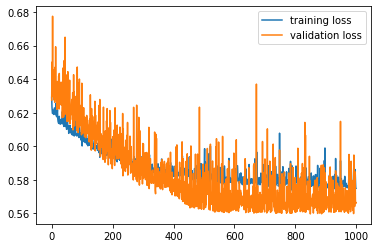

In [ ]:
plt.plot(his.history['loss'],label = "training loss")
plt.plot(his.history['val_loss'],label = "validation loss")
plt.legend()
plt.show()

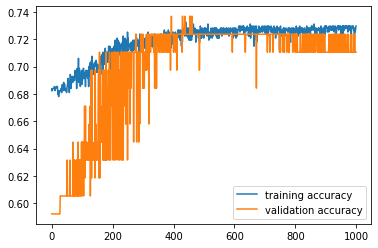

In [ ]:
plt.plot(his.history['accuracy'],label = "training accuracy")
plt.plot(his.history['val_accuracy'],label = "validation accuracy")
plt.legend()
plt.show()

In [ ]:
# Extra Models for comparison

'''
from sklearn.linear_model import LinearRegression,LogisticRegression
model1 = LinearRegression()
model2 = LogisticRegression()
model1.fit(x_train,y_train)
model2.fit(x_train,y_train)
model1.score(x_test,y_test)
model2.score(x_test,y_test)
'''


In [ ]:
from sklearn.svm import SVC
model3 = SVC()
model3.fit(x_train,y_train)

model3.score(x_test,y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.631578947368421

In [ ]:
parameters ={'kernel':['linear', 'poly', 'rbf', 'sigmoid', 'precomputed'],'gamma':[1e-3,1e-4],'C':[1000,10000,100000]}

gridmodel = GridSearchCV(SVC(),parameters,verbose=5)
gridmodel.fit(x_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] C=1000, gamma=0.001, kernel=linear ..............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:

#Best parameters according to those given in GridSearchCV
print("Best Model Parameters : {}".format(gridmodel.best_params_))